In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc

In [4]:
df = pd.read_csv('dataset_1672182.csv')
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate


In [5]:
qty_count = len(df[df['transaction_qty']>2]) 
print("Amount of orders where qty>2:", qty_count)
print("Total amount of orders:", len(df))
qty_probability = qty_count/len(df)*100
print("Propability that  orders contains more than 1 item:", qty_probability, "%")

Amount of orders where qty>2: 1439
Total amount of orders: 7356
Propability that  orders contains more than 1 item: 19.56226209896683 %


Text(0.5, 1.0, 'The different prices of products')

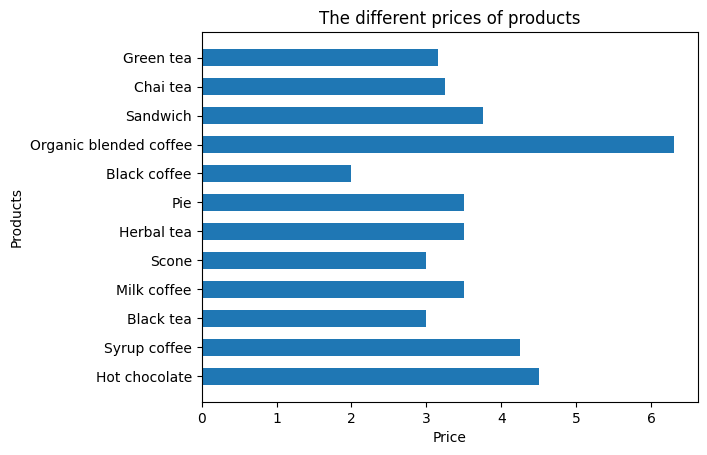

In [17]:
x = df['product_type']
y = df['unit_price']

plt.barh(x, y, height=0.6)
plt.xlabel('Price')
plt.ylabel('Products')
plt.title('The different prices of products') #labels per category toevoegen

In [7]:
mean_unit_price = np.mean(df['unit_price'])
median_unit_price = np.median(df['unit_price'])
print('Mean unit price:', mean_unit_price)
print('Median unit price:', median_unit_price)

Mean unit price: 3.8065524741707444
Median unit price: 3.5


The Mean is bigger than the Median so the unit prices are Right-skewed. This means there are reletively more cheaper products than there are expensive products

Question 3:

In [8]:
df['transaction_qty'] = pd.to_numeric(df['transaction_qty'])

df.insert(9, "revenue", df['unit_price'] * df['transaction_qty'])
df.head() #added revenue column to check what the total cash coming per transaction is

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,unit_price,product_category,product_type,revenue
0,1,06/07/2023,17:56:22,1.0,2.0,Utrecht,4.50,Chocolate,Hot chocolate,4.5
1,2,06/10/2023,12:32:57,2.0,2.0,Utrecht,4.25,Coffee,Syrup coffee,8.5
2,3,06/05/2023,10:17:06,1.0,1.0,Alkmaar,3.00,Tea,Black tea,3.0
3,4,06/06/2023,15:54:08,3.0,1.0,Alkmaar,3.50,Coffee,Milk coffee,10.5
4,5,06/09/2023,10:08:03,1.0,3.0,Eindhoven,4.50,Chocolate,Hot chocolate,4.5


In [9]:
print("Total amount of transactions:", len(df))
total_money_spent = (df['unit_price']*df["transaction_qty"]).sum()
print("Total amount of money spent:", total_money_spent )
print("Average revenue per transaction:", (total_money_spent/len(df)))

Total amount of transactions: 7356
Total amount of money spent: 54938.0
Average revenue per transaction: 7.468461120174007


In [10]:
unit_price_per_date = df.groupby('transaction_date')["revenue"].sum()

print("The total amount of money spent per day:")
print(unit_price_per_date)


#06/05 was a really bad day
#06/10 was a really good day


The total amount of money spent per day:
transaction_date
06/05/2023     2709.15
06/06/2023     6370.65
06/07/2023     6368.10
06/08/2023     8656.60
06/09/2023    10306.20
06/10/2023    11345.95
06/11/2023     9181.35
Name: revenue, dtype: float64


In [11]:
amount_of_transactions_per_day = df.groupby(df['transaction_date']).size() 

print(amount_of_transactions_per_day) #amout of transaction per day

transaction_date
06/05/2023     365
06/06/2023     846
06/07/2023     868
06/08/2023    1130
06/09/2023    1379
06/10/2023    1496
06/11/2023    1272
dtype: int64


In [22]:
AV_06_05 = (2709.15/365)
AV_06_06 = (6370.65/846)
AV_06_07 = (6368.10/868)
AV_06_08 = (8656.60/1130)
AV_06_09 = (10306.20/1379)
AV_06_10 = (11345.95/1496)
AV_06_11 = (9181.35/1272)

print("Average value per transaction 06/05:", AV_06_05)
print("Average value per transaction 06/06:", AV_06_06)
print("Average value per transaction 06/07:", AV_06_07)
print("Average value per transaction 06/08:", AV_06_08)
print("Average value per transaction 06/09:", AV_06_09)
print("Average value per transaction 06/10:", AV_06_10)
print("Average value per transaction 06/11:", AV_06_11)

#zondag 06/11 is de slechtste dag, woensdag 06/07 is ook slecht. donderdag 06/08 is het best

Average value per transaction 06/05: 7.422328767123288
Average value per transaction 06/06: 7.53031914893617
Average value per transaction 06/07: 7.33652073732719
Average value per transaction 06/08: 7.66070796460177
Average value per transaction 06/09: 7.473676577229877
Average value per transaction 06/10: 7.584191176470589
Average value per transaction 06/11: 7.218042452830189


In [32]:
#sample mean
Sample_mean_assignment3 = (AV_06_05 + AV_06_06 + AV_06_07 + AV_06_08 + AV_06_09 + AV_06_10 + AV_06_11) / 7
print("sample mean:", Sample_mean_assignment3)
Average_value_pdays = AV_06_05, AV_06_06, AV_06_07, AV_06_08, AV_06_09, AV_06_10, AV_06_11

Stdrd_deviation_assignment3 = np.std(Average_value_pdays, ddof=0)
print("Standard deviation:", Stdrd_deviation_assignment3)

sample mean: 7.46082668921701
Standard deviation: 0.13940889890802705


In [40]:
#95% Confidence interval: 

confidence_interval_assignment3 = Sample_mean_assignment3 + 1.96 * (Stdrd_deviation_assignment3/7)
print(confidence_interval_assignment3) #confidence interval 

#sc.t.interval(alpha=0.95, df=Average_value_pdays, loc=Sample_mean_assignment3, scale=Stdrd_deviation_assignment3) idk why this doesnt work

7.499861180911258


question 4 and its stuff starts here:

The first thing we do is set up the hypothesis we want to prove: 
Ha: The change in x has led to an increase in revenue

The second step is to set up the null hypothesis which is the opposite of the hypothesis we are trying to prove (you’ll understand why in a bit)
H0: The change in x did not affect the revenue

The third step is to simulate the sampling distribution in a world where the null hypothesis is true. Lets say we have 150 measurement, and we know that the population standard deviation (σ) is 3
The mean of the sampling distribution is the change in revenue if the null hypothesis is true

The final step is calculating the probability of finding a increase of y in your sample, if we assume the null hyothesis is true

so:
1: determine hypothesis
2: determine 0 hypothesis
3: Simulate a sampling distribution under the null hypothesis
4: Calculate the p-value (probality of finding your sample data using null hypothesis sampling distribution)
5: if the p-value is <0.05 accept your hypothesis in step 1 otherwise accept step 2

printing mean values is a discriptive analysis
